# Chapter 3 프랜차이즈 입점 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as f

In [2]:
data=pd.read_csv("상가업소정보_201912_01.csv",sep="|",encoding="utf-8")

In [4]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
data.drop({'상가업소번호','지점명','상권업종대분류코드','상권업종중분류코드','상권업종소분류코드','표준산업분류코드','시도코드',
          '시군구코드','행정동코드','법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'},axis=1,inplace=True)

In [38]:
data['소문자']=data['상호명'].str.lower()

In [68]:
data=data.loc[data['시도명']=='서울특별시']

In [72]:
brdk=data[data['소문자'].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins|던킨|dunkin").astype(bool)]

dtype이 object로 되어있어서 되지 않았었음

In [74]:
brdk.drop({'상권업종대분류명','상권업종중분류명','상권업종소분류명','표준산업분류명','시도명'},axis=1,inplace=True)

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
brdk['브랜드명']=brdk['소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins').astype(bool)

<ipython-input-76-ee0023e74f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdk['브랜드명']=brdk['소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins').astype(bool)


In [80]:
brdk['브랜드명']=brdk['브랜드명'].replace(True,"배스킨라빈스")
brdk['브랜드명']=brdk['브랜드명'].replace(False,"던킨도넛츠")

<ipython-input-80-841988958d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdk['브랜드명']=brdk['브랜드명'].replace(True,"배스킨라빈스")
<ipython-input-80-841988958d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdk['브랜드명']=brdk['브랜드명'].replace(False,"던킨도넛츠")


In [82]:
brdk.drop("소문자",axis=1,inplace=True)

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='경도', ylabel='위도'>

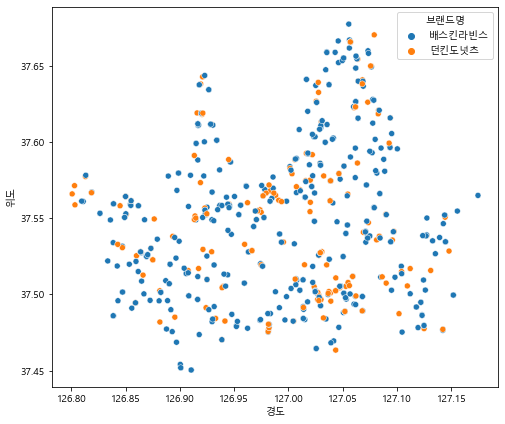

In [87]:
plt.rcParams['font.family']="Malgun Gothic"
plt.figure(figsize=(8,7))
sns.scatterplot(data=brdk,x='경도',y='위도',hue='브랜드명')

In [98]:
library=data.loc[data['상권업종중분류명']=='도서관/독서실']

In [100]:
library.drop({'상권업종대분류명','상권업종중분류명','상권업종소분류명','표준산업분류명','시도명','소문자'},axis=1,inplace=True)

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
library['종류']='독서실'

<ipython-input-102-0b39df01f85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library['종류']='독서실'


In [104]:
data[data['상호명'].str.contains('PC')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,경도,위도,소문자
765,프렌즈PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,종로구,창신2동,127.010427,37.573847,프렌즈pc방
838,라임PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,노원구,월계1동,127.058658,37.629241,라임pc방
1030,쓰리팝PC카페,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,강서구,우장산동,126.838378,37.557682,쓰리팝pc카페
1208,챔피언PC,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,구로구,가리봉동,126.891679,37.480156,챔피언pc
1516,PC텔,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,용산구,한강로동,126.959601,37.532890,pc텔
...,...,...,...,...,...,...,...,...,...,...,...
572262,세븐PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,서초구,방배4동,126.988959,37.492030,세븐pc방
572738,쓰리팝PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,마포구,망원2동,126.904909,37.561373,쓰리팝pc방
572965,라이또PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,송파구,가락2동,127.134655,37.495052,라이또pc방
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,컴퓨터 게임방 운영업,서울특별시,성동구,성수2가3동,127.054615,37.545853,앤탑pc방


In [106]:
pcr=data.loc[data['상권업종소분류명']=='인터넷PC방']

In [108]:
pcr.drop({'상권업종대분류명','상권업종중분류명','상권업종소분류명','표준산업분류명','시도명','소문자'},axis=1,inplace=True)
pcr['종류']='PC방'

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-108-659ee3f0065f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcr['종류']='PC방'


In [110]:
total=pd.concat([library,pcr])

<AxesSubplot:xlabel='경도', ylabel='위도'>

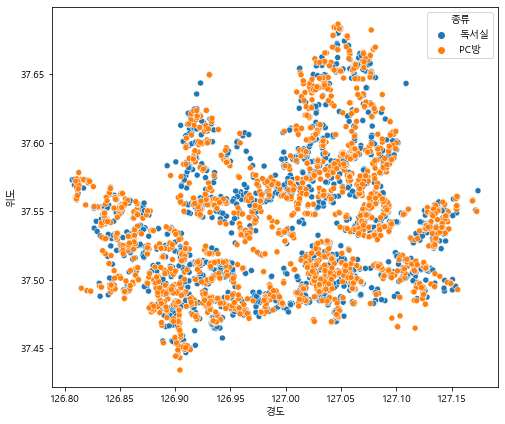

In [112]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=total,x='경도',y='위도',hue='종류')

In [117]:
total['종류']=total['종류'].replace('독서실',1)
total['종류']=total['종류'].replace('PC방',0)

In [118]:
total

,상호명,시군구명,행정동명,경도,위도,종류
432,승리고시텔,광진구,중곡3동,127.085858,37.568274,1
626,씨티빌고시원,동작구,상도2동,126.936674,37.504429,1
893,수독서실,용산구,원효로1동,126.967624,37.539385,1
983,엘리트고시원,강서구,화곡6동,126.848165,37.550516,1
1021,리빙캐슬,강동구,길동,127.140334,37.534335,1
...,...,...,...,...,...,...
572879,토스피아,강서구,염창동,126.864328,37.557106,0
572965,라이또PC방,송파구,가락2동,127.134655,37.495052,0
573146,3poppc방,중구,중림동,126.968793,37.559678,0
573676,앤탑PC방,성동구,성수2가3동,127.054615,37.545853,0


In [119]:
total.corr()

,경도,위도,종류
경도,1.000000,0.204752,0.019189
위도,0.204752,1.000000,-0.042924
종류,0.019189,-0.042924,1.000000
